<b><h1>Working with Time Series Data

In [46]:
#imports

import requests
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()
sf_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
sf_temps.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,8759.0,56.924112,6.107079,45.6,52.3,56.5,60.7,72.2


In [5]:
sf_temps.sample(10)

,temp,date
5403,57.1,2010-08-14 04:00:00
3387,53.2,2010-05-22 04:00:00
7805,49.7,2010-11-22 06:00:00
6823,59.2,2010-10-12 08:00:00
4676,58.6,2010-07-14 21:00:00
356,50.7,2010-01-15 20:00:00
2370,54.5,2010-04-09 19:00:00
1359,58.5,2010-02-26 15:00:00
3939,54.3,2010-06-14 04:00:00
3376,61.9,2010-05-21 17:00:00


In [6]:
sf_temps = sf_temps.set_index('date')
sf_temps = sf_temps.sort_index()
sf_temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<b><h3>Use the above dataset for the following exercises:

<b>Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
daily_resample = sf_temps.resample('D').mean()
daily_resample.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


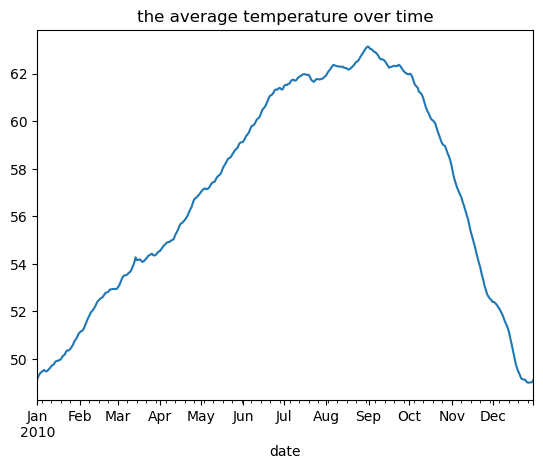

In [8]:
daily_resample.temp.plot()

plt.title('the average temperature over time')
plt.show()

<b>Write the code necessary to visualize the minimum temperature over time.


In [9]:
min_temp = sf_temps.resample('D').agg(['min'])
min_temp.head()

,temp
,min
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


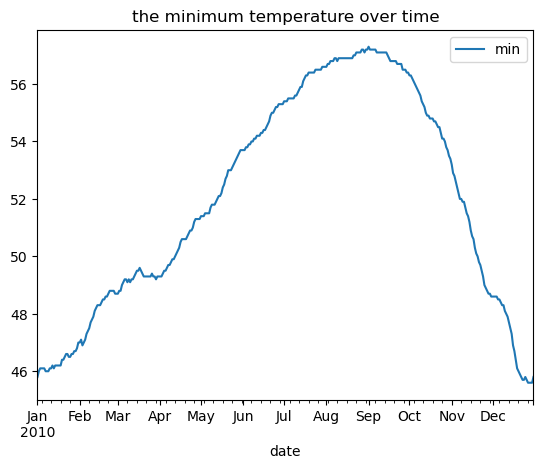

In [10]:
min_temp.temp.plot()

plt.title('the minimum temperature over time')
plt.show()

<b>Write the code necessary to visualize the maximum temperature over time.


In [11]:
max_temp = sf_temps.resample('D').agg(['max'])
max_temp.head()

,temp
,max
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


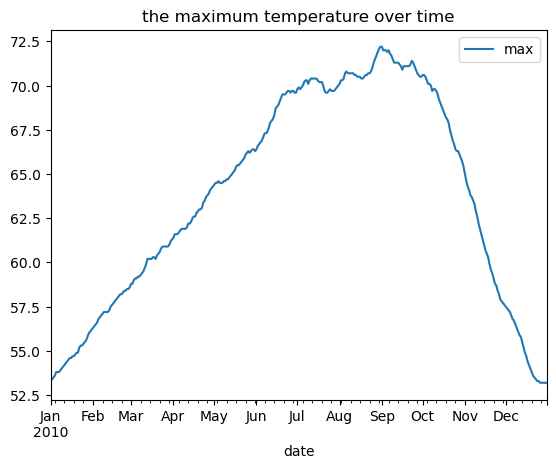

In [12]:
max_temp.temp.plot()

plt.title('the maximum temperature over time')
plt.show()

<b>Which month is the coldest, on average?


In [15]:
sf_temps['month'] = sf_temps.index.month_name()
sf_temps.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [18]:
sf_temps.groupby(sf_temps.index.month_name()).mean().idxmin()

temp    January
dtype: object

<Axes: xlabel='date'>

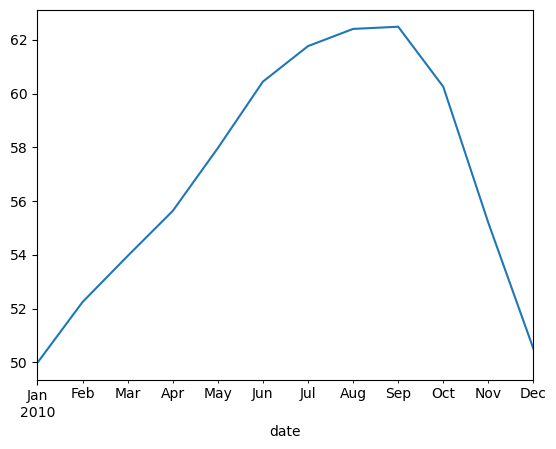

In [16]:
sf_temps.resample('M').mean().temp.plot(label='monthly')

<b>Which month has the highest average temperature?


In [19]:
sf_temps.groupby(sf_temps.index.month_name()).mean().idxmax()

temp    September
dtype: object

<b>Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [22]:
sf_temps = sf_temps.drop(columns='month')


In [23]:
min_max_temp = sf_temps.resample('D').agg(['min','max'])
min_max_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [24]:
min_max_temp['change in temp'] = min_max_temp[max] - min_max_temp[min]
min_max_temp.resample('M').max().sort_values('change in temp', ascending = False)

temp       change in temp
             min   max               
date                                 
2010-01-31  47.0  56.2           -7.4
2010-12-31  48.6  57.5           -7.4
2010-11-30  53.2  65.0           -9.0
2010-02-28  48.8  58.6           -9.1
2010-03-31  49.6  61.3          -10.0
2010-04-30  51.3  64.3          -12.0
2010-10-31  56.3  70.6          -12.0
2010-05-31  53.7  66.4          -12.6
2010-06-30  55.3  69.7          -12.7
2010-07-31  56.6  70.4          -13.2
2010-08-31  57.2  72.2          -13.5
2010-09-30  57.3  72.2          -14.0

<b>Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


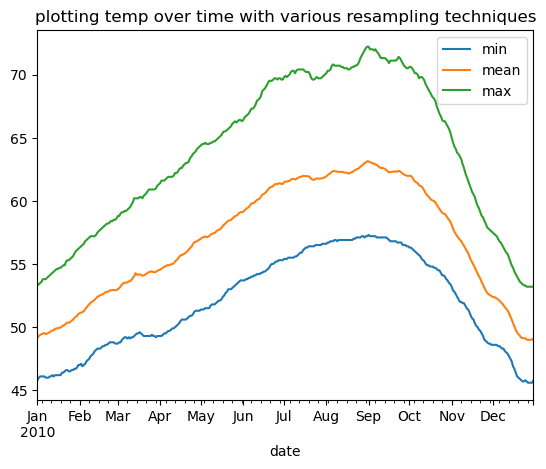

In [25]:
# plt.figure(figsize=(14,10))
sf_temps.resample('D').agg(['min','mean','max']).temp.plot();

plt.title('plotting temp over time with various resampling techniques')
plt.legend()
plt.show()

In [26]:
seattle_weather = data.seattle_weather()
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [28]:
seattle_weather = seattle_weather.set_index('date')
seattle_weather = seattle_weather.sort_index()
seattle_weather

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [29]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


<b><h3>Use the above dataset for the following exercises:



<b>Which year and month combination has the highest amount of precipitation?


In [30]:
seattle_weather.resample('Y').max().resample('M').max().sort_values('precipitation', ascending = False).head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-12-31,55.9,35.0,18.3,8.0,sun
2012-12-31,54.1,34.4,18.3,9.5,sun
2014-12-31,46.7,35.6,17.8,8.8,sun


<b>Visualize the amount of monthly precipitation over time.


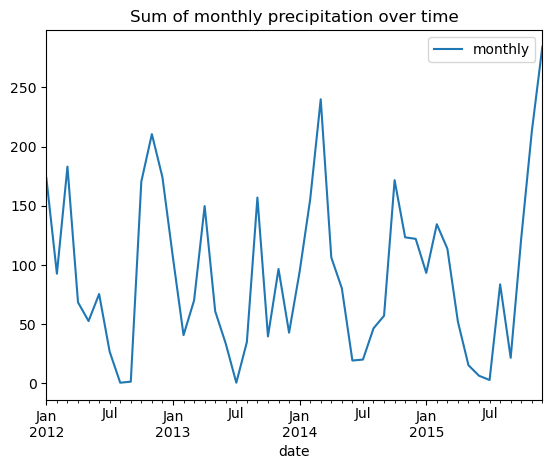

In [31]:
seattle_weather.resample('M').sum().precipitation.plot(label='monthly')
plt.title('Sum of monthly precipitation over time')
plt.legend()
plt.show()

<b>Visualize the amount of wind over time. Choose a time interval you think is appropriate.



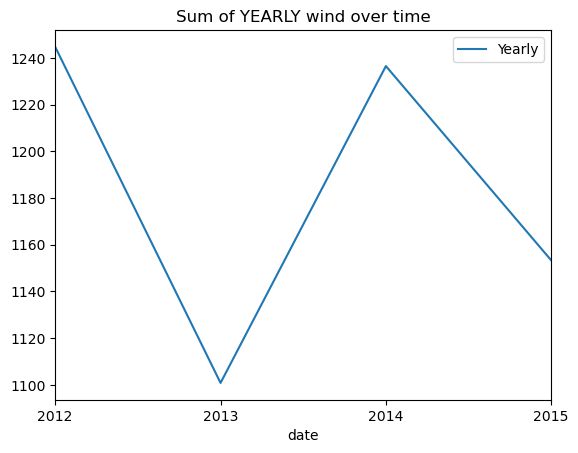

In [32]:
seattle_weather.resample('Y').sum().wind.plot(label='Yearly')
plt.title('Sum of YEARLY wind over time')
plt.legend()
plt.show()

<b>Which year-month combination is the windiest?


In [33]:
seattle_weather.resample('M').wind.sum().sort_values(ascending = False).head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

<b>What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [34]:
seattle_weather[seattle_weather.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

<b>In which month does it rain the most?

In [38]:
seattle_weather.groupby(seattle_weather.index.month_name()).sum().precipitation.idxmax()


'November'

<b>Which month has the most number of days with a non-zero amount of precipitation?


In [40]:
seattle_weather.resample('M').max().resample('D').sum().sort_values('precipitation').query('precipitation > 0.0').head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2012-09-30,0.3,32.2,14.4,5.6


In [42]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [43]:
df = df.set_index('date')
df = df.sort_index()

In [44]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


<b><h3>Use the above dataset for the following exercises:



<b>Convert any negative delays to 0.


In [47]:
df.delay = np.where(df.delay < 0, 0, df.delay)

<b>Which hour of the day has the highest average delay?


In [48]:
df['hour'] = df.index.hour
df.groupby('hour').mean().delay.sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

<b>Does the day of the week make a difference in the delay amount?


In [49]:
df['weekday'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [50]:
df.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

<b>Does the month make a difference in the delay amount?


In [51]:
df['month'] = df.index.month_name()
df.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64